## import the libraries

In [15]:
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install tensorflow
!pip install matplotlib
!pip install opencv-python
!pip install os
!pip install random
!pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 759.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 4.9 MB/s eta 0:00:0000:0100:01


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
import cv2 as cv
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

2024-04-18 18:11:30.177968: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 18:11:30.178140: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 18:11:30.180143: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 18:11:30.206923: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 18:11:30.753179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## load data

In [2]:
image_cat = "/home/pc22/Pictures/Lab 7/Cat vs dog/archive/PetImages/Cat"
image_dog = "/home/pc22/Pictures/Lab 7/Cat vs dog/archive/PetImages/Dog"
image_list = []
count = 0

for filename in os.listdir(image_cat):
    if count == 4144:
        break
    try:
        img = cv.imread(f"/home/pc22/Pictures/Lab 7/Cat vs dog/archive/PetImages/Cat/{filename}")
        img_resized = cv.resize(img, (150, 150))
        img_array = np.array(img_resized)
        image_list.append(img_array)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

for image in os.listdir(image_dog):
    if count == 4144+845:
        break
    try:
        img2 = cv.imread(f"/home/pc22/Pictures/Lab 7/Cat vs dog/archive/PetImages/Dog/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')



Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/i

In [3]:
len(image_cat)

58

In [4]:
len(image_dog)

58

In [5]:
len(image_list)

4978

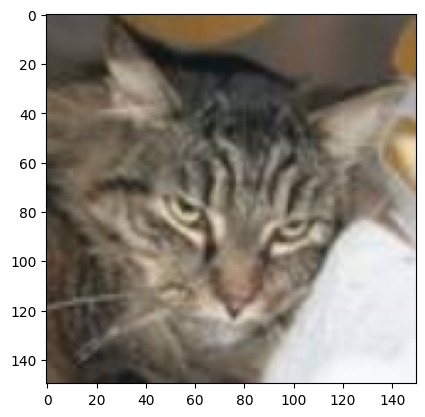

In [6]:
plt.imshow(image_list[119][:,:,::-1])

## create labels

In [7]:
label_list = []
for i in range(4144):
    label_list.append(1)
for j in range(4144+845):
    label_list.append(0)

In [8]:
label_list[119]

1

## rajdomize labels and images

In [9]:
combined = list(zip(label_list, image_list))
random.shuffle(combined)
shuffled_labels, shuffled_images = zip(*combined)

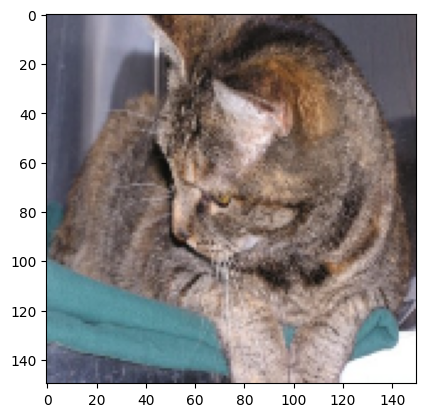

In [10]:
plt.imshow(shuffled_images[700][:,:,::-1])

In [11]:
shuffled_labels[700]

1

In [12]:
image_array = np.array(shuffled_images) 
labels_array = np.array(shuffled_labels)

## split data for test and validation

In [13]:
x_train, x_test, y_train, y_test = train_test_split(image_array, labels_array, test_size=0.2)

In [14]:
x_train1, x_validation, y_train1, y_validation = train_test_split(x_train, y_train, test_size=0.15)

## augmentation data model

In [15]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2)
])

## callback

In [16]:
callback = keras.callbacks.EarlyStopping(patience=4, monitor='val_loss')

## CNN model

In [17]:
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=output)

In [18]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         6,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 984,897 (3.76 MB)

 Trainable params: 984,897 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [20]:
history = model.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=5, callbacks=callback)

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.7824 - loss: 0.5408 - val_accuracy: 0.8127 - val_loss: 0.4809
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.8423 - loss: 0.4463 - val_accuracy: 0.8127 - val_loss: 0.4798
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.8353 - loss: 0.4514 - val_accuracy: 0.8127 - val_loss: 0.4791
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.8189 - loss: 0.4756 - val_accuracy: 0.8127 - val_loss: 0.4750
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.8284 - loss: 0.4561 - val_accuracy: 0.8127 - val_loss: 0.4742


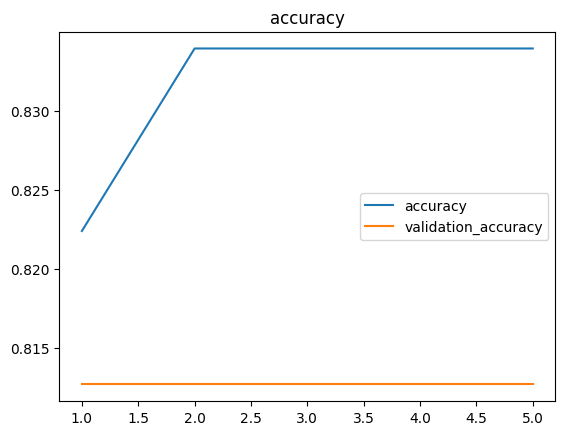

In [22]:
my_dict = history.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

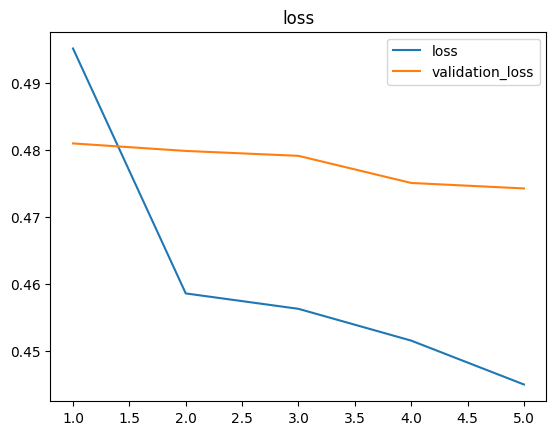

In [23]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

In [24]:
model.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8541 - loss: 0.4194


[0.43396061658859253, 0.8393574357032776]

In [25]:
y_pred = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step


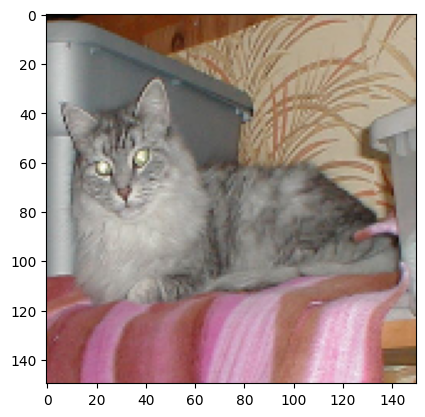

In [26]:
plt.imshow(x_test[100][:,:,::-1])

In [27]:
y_test[100]

1

In [28]:
xception_bace = keras.applications.vgg16.VGG16(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(xception_bace.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs=xception_bace.input, outputs=output)

In [29]:
for layer in xception_bace.layers:
  layer.trainable = False

In [30]:
model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [31]:
history2 = model2.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=5, callbacks=callback)

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 94s 886ms/step - accuracy: 0.7637 - loss: 2.2870 - val_accuracy: 0.8997 - val_loss: 0.5164
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 101s 951ms/step - accuracy: 0.9329 - loss: 0.4238 - val_accuracy: 0.9398 - val_loss: 0.3257
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 99s 936ms/step - accuracy: 0.9619 - loss: 0.2213 - val_accuracy: 0.9415 - val_loss: 0.2481
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 98s 930ms/step - accuracy: 0.9541 - loss: 0.3338 - val_accuracy: 0.9515 - val_loss: 0.2332
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 99s 936ms/step - accuracy: 0.9727 - loss: 0.1828 - val_accuracy: 0.9448 - val_loss: 0.2387


In [32]:
model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,716,229 (56.14 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,028 (4.02 KB)

In [33]:
model.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8541 - loss: 0.4194


[0.43396061658859253, 0.8393574357032776]

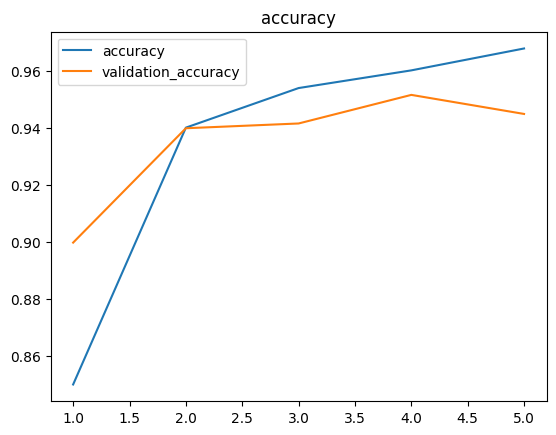

In [34]:
my_dict = history2.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

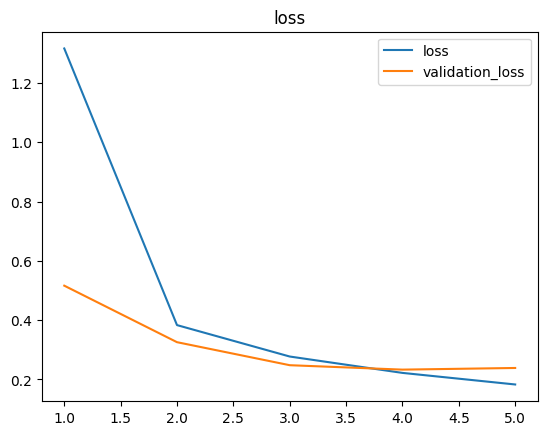

In [35]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()